In [394]:
# importing required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [395]:
#Load churn data set
churn_data = pd.read_csv("D:\empirical\Project\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [396]:
# Read the contents of the data
churn_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [397]:
#Quantity of data set
churn_data.shape

(7043, 21)

The company in the dataset is in the telecomm sector.

In [398]:
#Statistics of the numerical features
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [399]:
#dataset type description
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### DATA PREPROCESSING

In [400]:
#the customerId is a random number+alphabets which is irrelevant for our churn prediction analysis
churn_data = churn_data.drop('customerID', axis=1)

In [401]:
# check for any missing or null data in the dataset
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [402]:
#print the first 5 rows
churn_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [403]:
# the columns of the dataset
columns  = churn_data.columns

In [404]:
# The rows of the dataset
rows = churn_data.values

#### 1.DATA ENCODING

In [405]:
# t stands for transformend data, did so for ease of ML modelling
churn_data_t = churn_data.copy()

In [406]:
#importing skelearn library to encode the data
import sklearn
from sklearn.preprocessing import LabelEncoder

In [407]:
#The data is encoded
encode = LabelEncoder()
for column in columns:
  churn_data_t[column] = encode.fit_transform(churn_data_t[column])

In [408]:
#The transposed data is being displayed
churn_data_t.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,0,1,1,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,1
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
Dependents,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,0,1,1,0,1,1,1,0,1,1,...,1,1,1,0,1,1,1,0,1,1
MultipleLines,1,0,0,1,0,2,2,1,2,0,...,0,2,0,1,0,2,2,1,2,0
InternetService,0,0,0,0,1,1,1,0,1,0,...,1,1,1,0,2,0,1,0,1,1
OnlineSecurity,0,2,2,2,0,0,0,2,0,2,...,0,2,0,0,1,2,0,2,0,2
OnlineBackup,2,0,2,0,0,0,2,0,0,2,...,0,2,0,2,1,0,2,0,0,0


### DATA VISUALIZATION

#### Statistical

In [409]:
# Average Monthly Charges
avg_MC = np.mean(churn_data['MonthlyCharges'])
print("The average Monthly charges : ", round(avg_MC,2))


The average Monthly charges :  64.76


In [410]:
# Average Tenure
avg_t = np.mean(churn_data['tenure'])
print("The average Tenure of the customers in the company : ", round(avg_t,2),"months")

The average Tenure of the customers in the company :  32.37 months


In [411]:
# count all the similar data values and club them.
value_counts = churn_data.groupby(['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']).size().reset_index(name='count')
table = value_counts.to_markdown()

# Printing the tabular representation
print(table)


|      | gender   |   SeniorCitizen | Partner   | Dependents   |   tenure | PhoneService   | MultipleLines    | InternetService   | OnlineSecurity      | OnlineBackup        | DeviceProtection    | TechSupport         | StreamingTV         | StreamingMovies     | Contract       | PaperlessBilling   | PaymentMethod             |   MonthlyCharges | TotalCharges   | Churn   |   count |
|-----:|:---------|----------------:|:----------|:-------------|---------:|:---------------|:-----------------|:------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:---------------|:-------------------|:--------------------------|-----------------:|:---------------|:--------|--------:|
|    0 | Female   |               0 | No        | No           |        1 | No             | No phone service | DSL               | No                  | No                  | No                  | No                  | No      

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


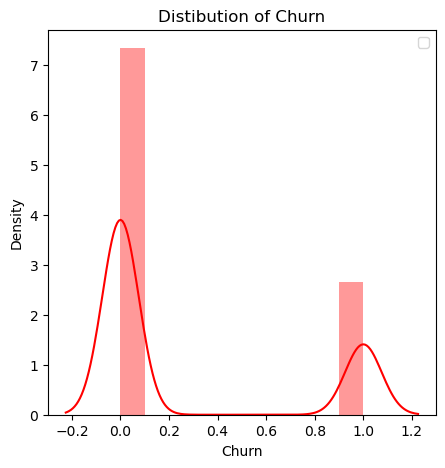

In [412]:
plt.figure(figsize=(5,5))
sns.distplot(churn_data_t['Churn'], color = "red")
plt.title("Distibution of Churn")
plt.legend()
# 0 value on X-axis corresponds to No
# 1 value on X-axis corresponds to YES

Text(0.5, 1.0, 'Churn Classification')

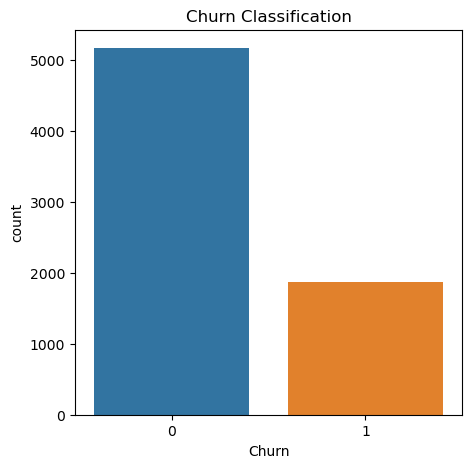

In [413]:
# count plot for churn 
plt.figure(figsize=(5, 5))
sns.countplot(data = churn_data_t, x="Churn").set_title('Churn Classification')

#### 1.Demographics

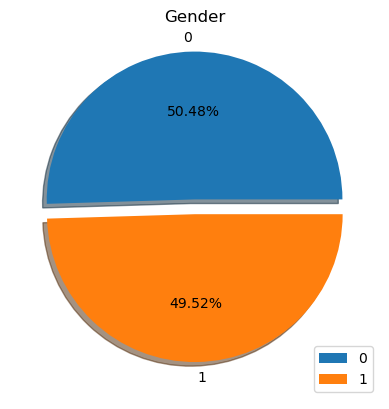

In [414]:
#Gender representation
plt.title("Gender")
plt.pie(churn_data_t['gender'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

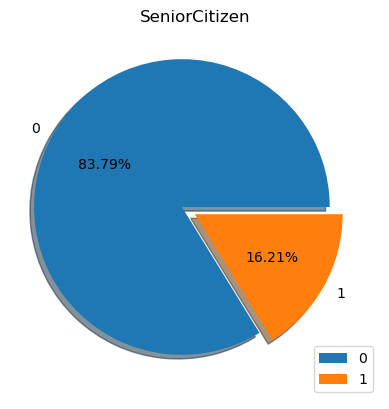

In [415]:
#SeniorCitizen representation
plt.title("SeniorCitizen")
plt.pie(churn_data_t['SeniorCitizen'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

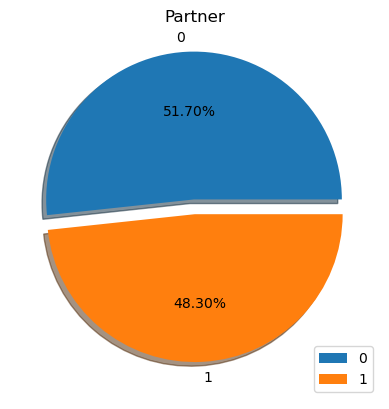

In [416]:
#Partner representation
plt.title("Partner")
plt.pie(churn_data_t['Partner'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')


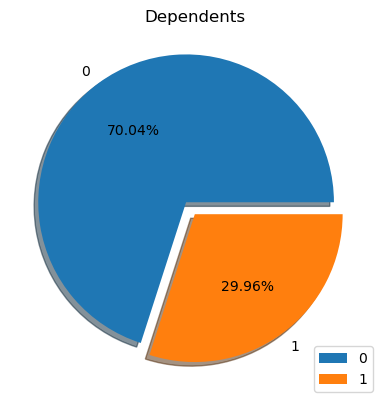

In [417]:
#Dependents representation
plt.title("Dependents")
plt.pie(churn_data_t['Dependents'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

#### COUNT PLOTS

C:\Users\Shiny Shamma\AppData\Local\Temp\ipykernel_30760\4286109492.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1000x800 with 0 Axes>

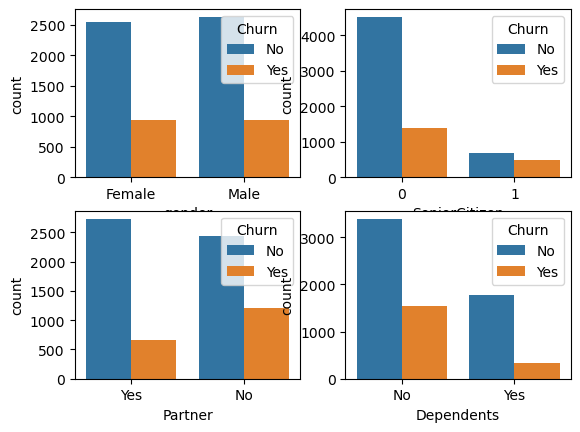

In [418]:
#The count plot is being generated for each columns
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(2,2)
sns.countplot(x ='gender', hue = "Churn", data = churn_data, ax=ax[0,0])
sns.countplot(x ='SeniorCitizen', hue = "Churn", data = churn_data, ax=ax[0,1])
sns.countplot(x ='Partner', hue = "Churn", data = churn_data, ax=ax[1,0])
sns.countplot(x ='Dependents', hue = "Churn", data = churn_data, ax=ax[1,1])

fig.show()

C:\Users\Shiny Shamma\AppData\Local\Temp\ipykernel_30760\3073922613.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 2000x4500 with 0 Axes>

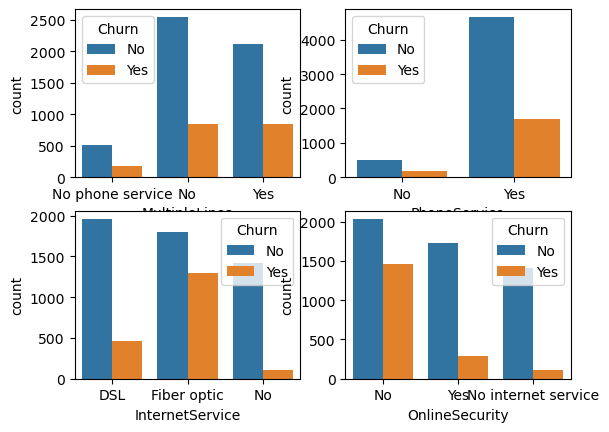

In [419]:
plt.figure(figsize=(20,45))
fig, ax = plt.subplots(2,2)
sns.countplot(x ='MultipleLines', hue = "Churn", data = churn_data, ax=ax[0,0])
sns.countplot(x ='PhoneService', hue = "Churn", data = churn_data, ax=ax[0,1])
sns.countplot(x ='InternetService', hue = "Churn", data = churn_data, ax=ax[1,0])
sns.countplot(x ='OnlineSecurity', hue = "Churn", data = churn_data, ax=ax[1,1])
fig.show()

C:\Users\Shiny Shamma\AppData\Local\Temp\ipykernel_30760\3767533417.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1000x800 with 0 Axes>

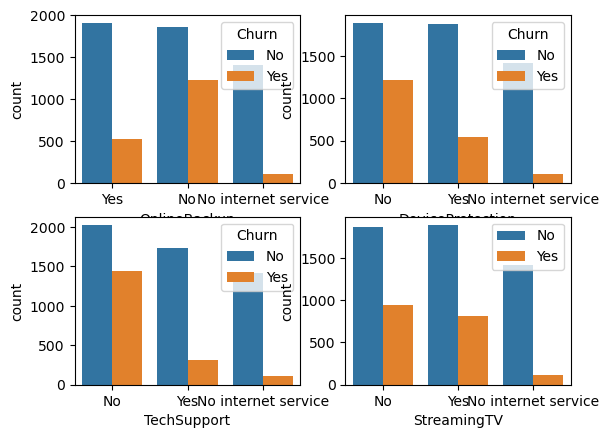

In [420]:
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(2,2)
sns.countplot(x ='OnlineBackup', hue = "Churn", data = churn_data, ax=ax[0,0])
sns.countplot(x ='DeviceProtection', hue = "Churn", data = churn_data, ax=ax[0,1])
sns.countplot(x ='TechSupport', hue = "Churn", data = churn_data, ax=ax[1,0])
sns.countplot(x ='StreamingTV', hue = "Churn", data = churn_data, ax=ax[1,1])
plt.legend()
fig.show()

C:\Users\Shiny Shamma\AppData\Local\Temp\ipykernel_30760\1551470893.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1000x800 with 0 Axes>

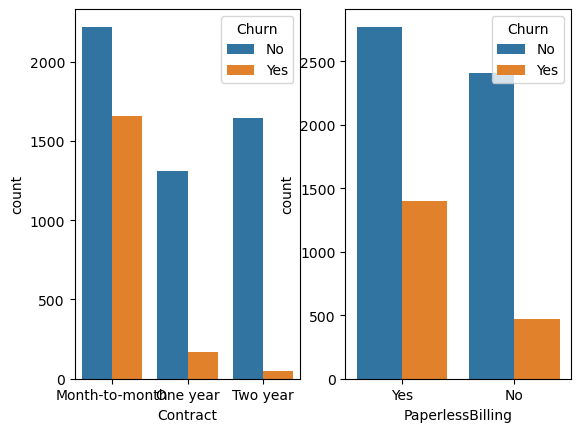

In [421]:
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(1,2)
sns.countplot(x ='Contract', hue = "Churn", data = churn_data, ax=ax[0])
sns.countplot(x ='PaperlessBilling', hue = "Churn", data = churn_data, ax=ax[1])

fig.show()


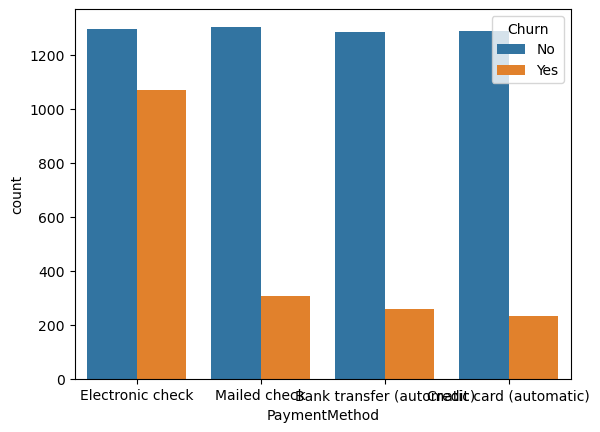

In [422]:
sns.countplot(x ='PaymentMethod', hue = "Churn", data = churn_data)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

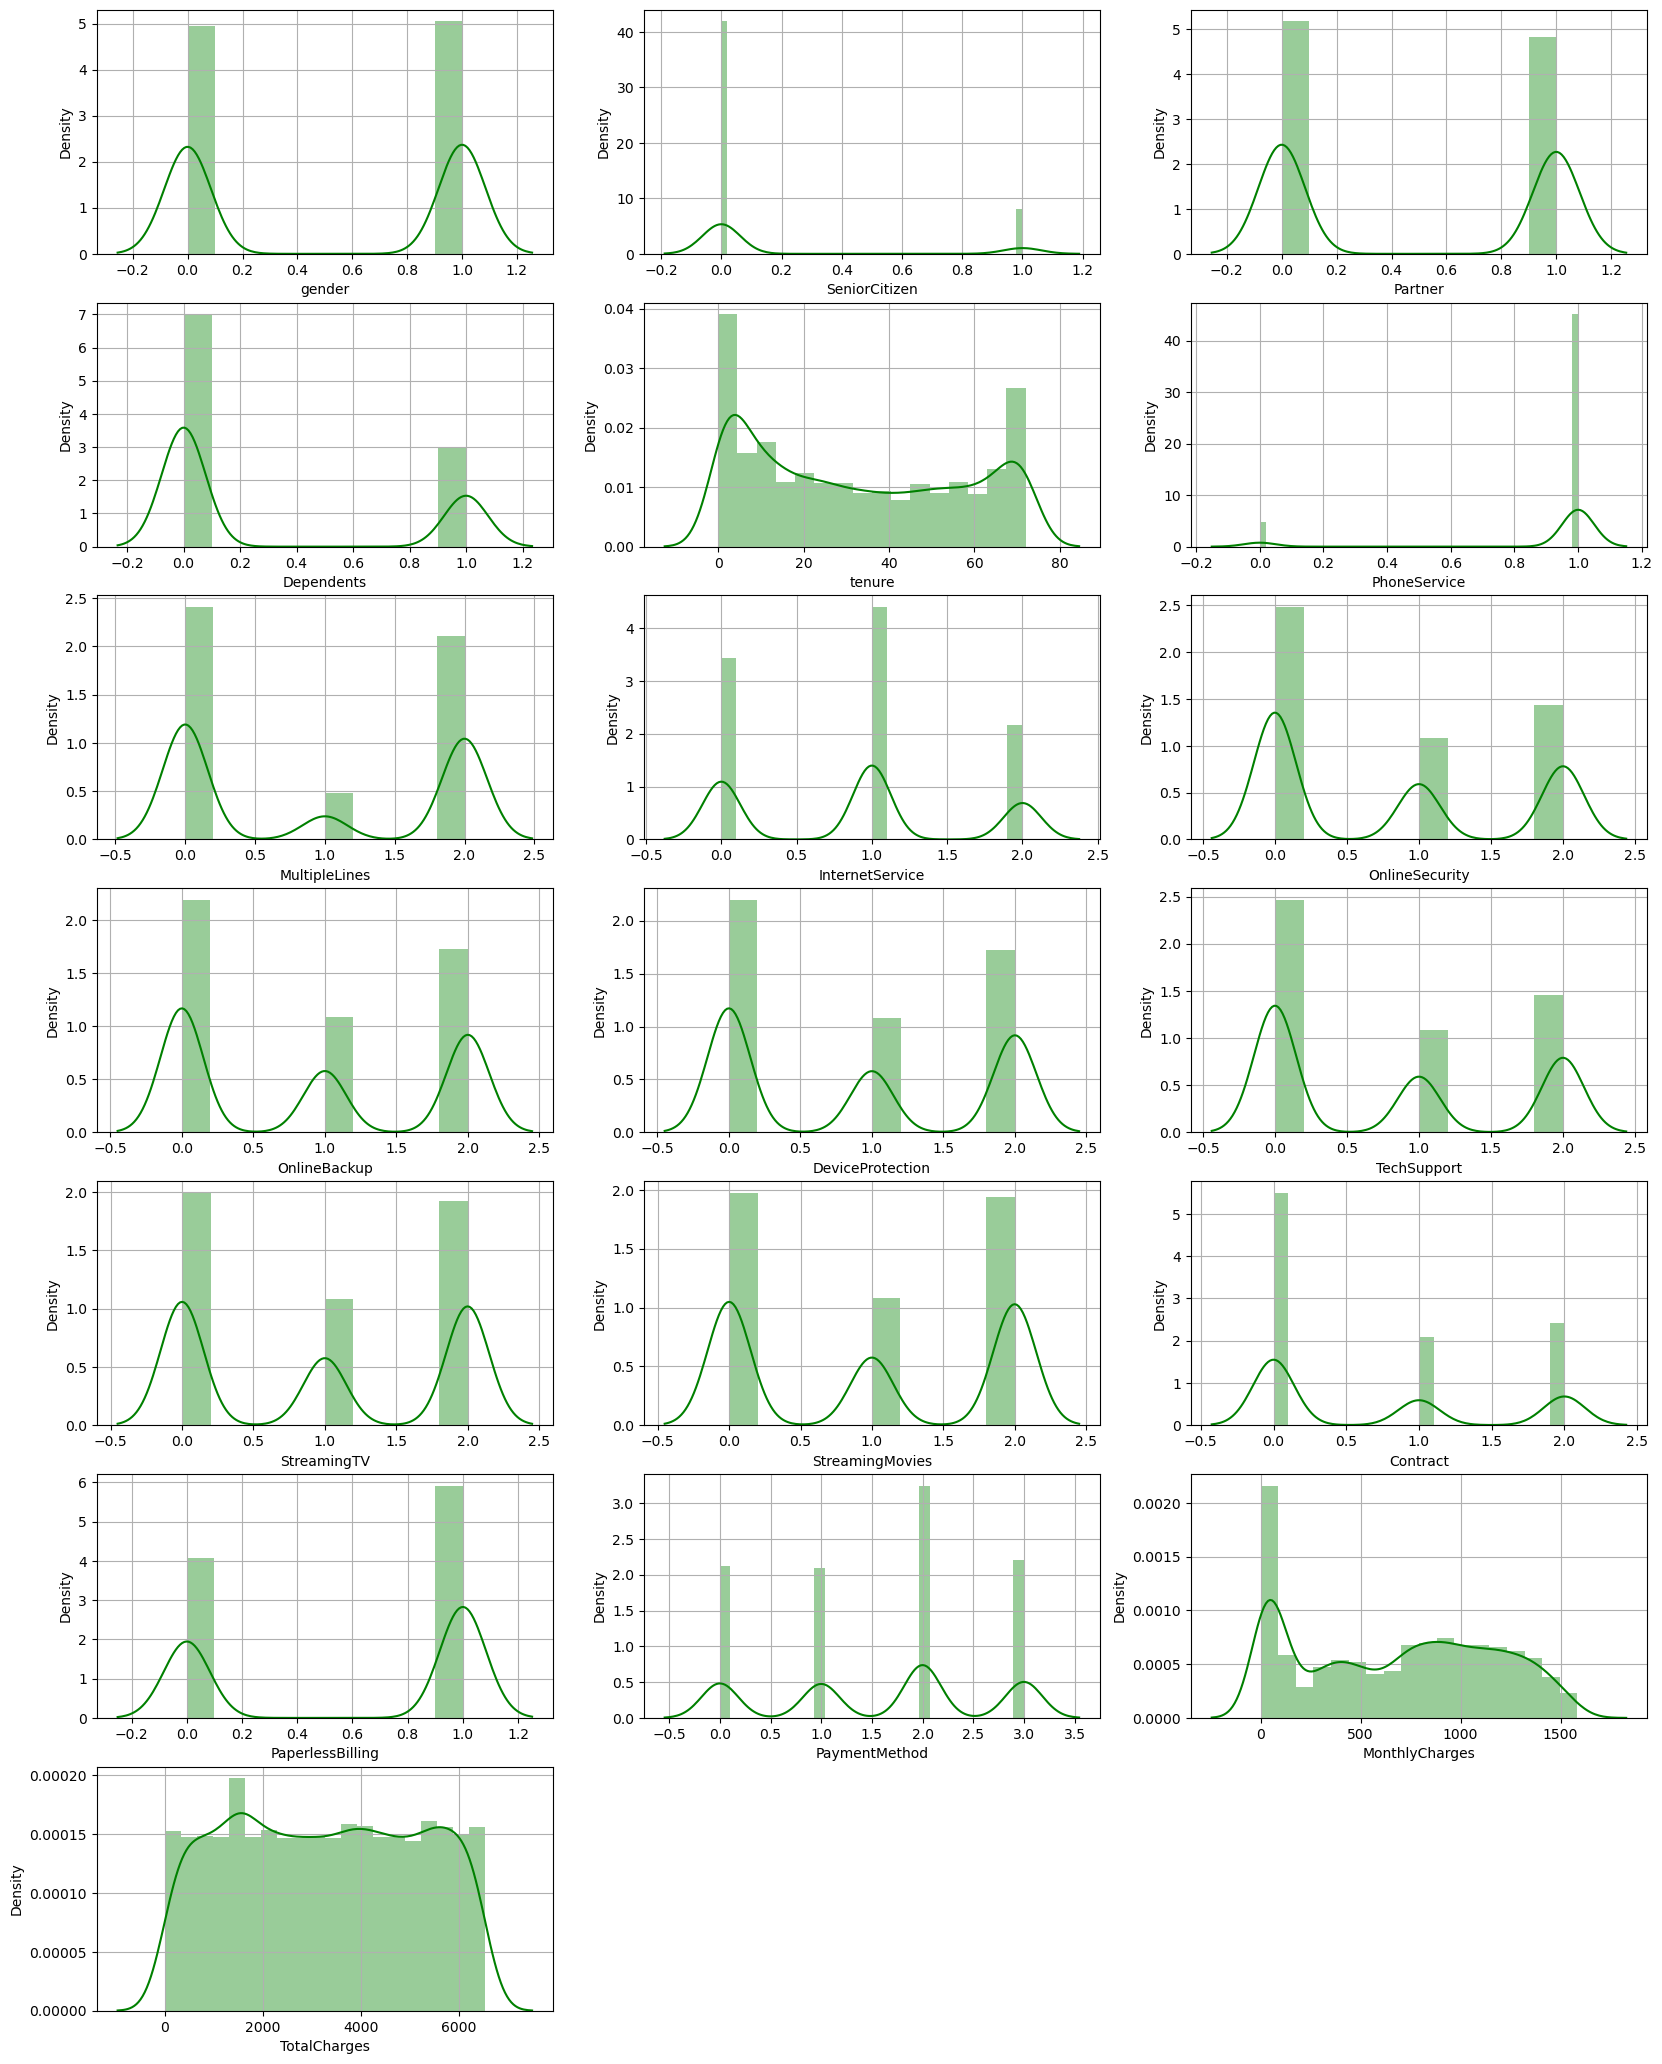

In [423]:
#All the columns are visualized using displot
plt.figure(figsize=(20, 45))

for i in range(0, 19):
    plt.subplot(12,3,i+1)
    sns.distplot(churn_data_t.iloc[:, i], color='green')
    plt.grid()

## CORRELATION

In [424]:
#The data is correllated and displayed
churn_corr = churn_data_t.corr()
churn_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.090756,-0.195525


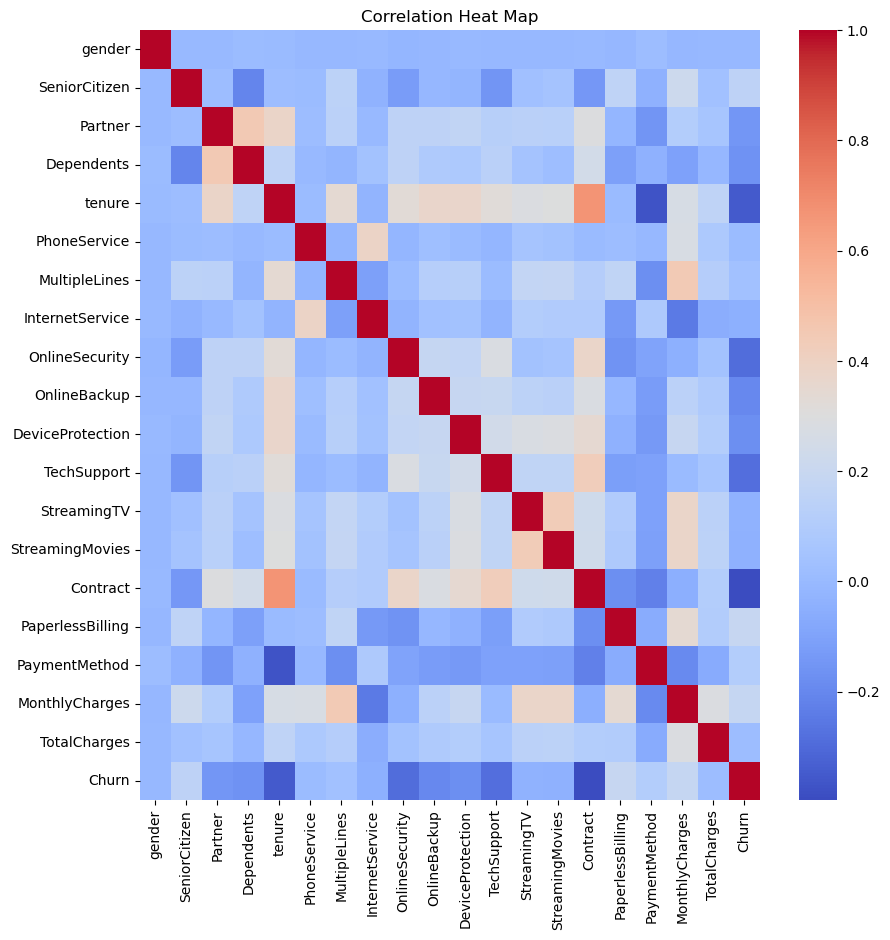

In [425]:
#The heatmap is obtained for the correlated data
plt.figure(figsize=(10,10))
sns.heatmap(churn_corr, cmap = 'coolwarm')
plt.title('Correlation Heat Map')
plt.show()

#### DATASET PREPARATION FOR ML MODELLING


In [426]:
# Import Standard Scaler from sklearn
from sklearn.preprocessing import StandardScaler
x = churn_data_t.iloc[:, :19].values # The first 19 columns(total dataset columns - customerID-Churn)
x = StandardScaler().fit_transform(x) # Standard scaler is used to standardize the data
x

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.13176632, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.38773977, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.51731743, -1.64188328],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.14221613, -0.13968008],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.23297901, -0.31653445],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.4723266 ,  1.13801338]])

#### DATA SET FOR PCA

In [427]:
#PCA
p = x.copy()
from sklearn.decomposition import PCA
components = 9 #from SPSS 95% confidence interval

DR = PCA(n_components=components) # defining number of componets for Dimentional Reduction
p_DR = DR.fit_transform(p)

churn_DR = DR.inverse_transform(p_DR)[:, :components]

#### MODEL TRAINING(WITHOUT PCA)

In [428]:
y = churn_data_t['Churn'].values

In [429]:
# Importing Train Test Split from Sklearn and training the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

In [430]:
# The dimensions of the model is displayed
print(X_train.shape)
print(X_test.shape)

(5282, 19)
(1761, 19)


#### MODEL TRAINING(WITH PCA)

In [431]:
# Training the model with PCA 
P_train, P_test, q_train, q_test = train_test_split(churn_DR, y, test_size=0.25, random_state=3)

#### PERFORMANCE FUNCTION

In [432]:
# Required Libraries are imported to obtain performance scores
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


In [433]:
# A Function is defined to give the performance attributes of the data
def performance_metrics(y_pred):
    print("Precision : ", round(precision_score(Y_test, y_pred, average = 'micro'),4)) # calculates precision
    print("Recall : ", round(recall_score(Y_test, y_pred, average = 'micro'),4)) # calculates Recall
    print("Accuracy : ", round(accuracy_score(Y_test, y_pred),4)) # calculates Accuracy
    print("F1 Score : ", round(f1_score(Y_test, y_pred, average = 'micro'),4))# # calculates f1 score
    cm = confusion_matrix(Y_test, y_pred) # create confusion matrix for the model
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(Y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Churn-NO', 'Churn-YES']) # creates confusion matrix plot
    cm.plot()



> ## ***MACHINE LEARNING MODELS (WITHOUT PCA)***




#### LOGISTIC REGRESSION

In [434]:
# LogisticRegression without PCA
from sklearn.linear_model import LogisticRegression 
churn_pred_LR = LogisticRegression() # dependent value prediction
churn_pred_LR.fit(X_train, Y_train) # Model fitting

LogisticRegression()

In [435]:
y_pred_LR = churn_pred_LR.predict(X_test)

Precision :  0.8171
Recall :  0.8171
Accuracy :  0.8171
F1 Score :  0.8171

 [[1194  110]
 [ 212  245]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1304
           1       0.69      0.54      0.60       457

    accuracy                           0.82      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.81      0.82      0.81      1761

******************************************************



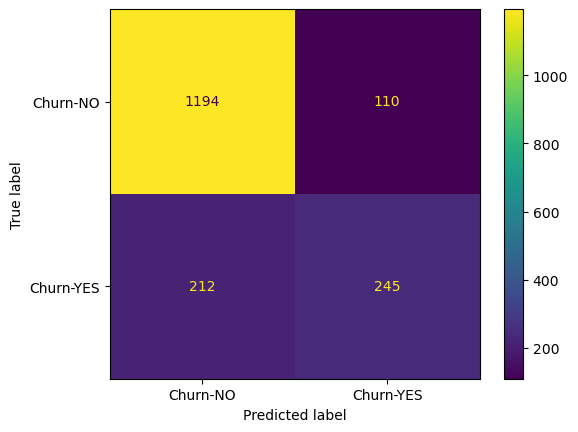

In [436]:
performance_metrics(y_pred_LR) # Performance for Logistic Regression model without PCA

#### GRADIENT BOOSTING CLASSIFIER

In [437]:
# Importing GradientBoostingClassifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier
churn_pred_GB = GradientBoostingClassifier() # predicting the dependent values using GBC
churn_pred_GB.fit(X_train, Y_train) # Fitting the model

GradientBoostingClassifier()

In [438]:
y_pred_GB = churn_pred_GB.predict(X_test)

Precision :  0.8081
Recall :  0.8081
Accuracy :  0.8081
F1 Score :  0.8081

 [[1201  103]
 [ 235  222]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1304
           1       0.68      0.49      0.57       457

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.80      0.81      0.80      1761

******************************************************



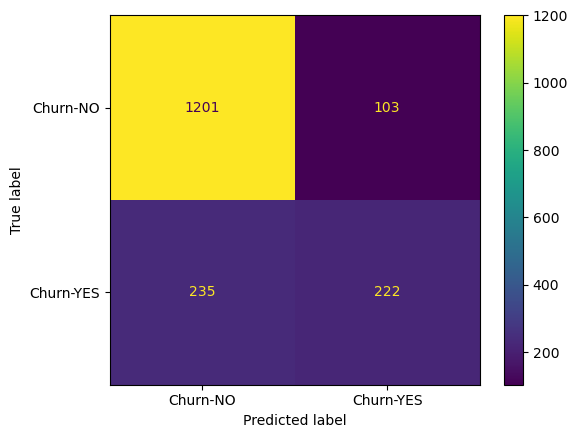

In [439]:
performance_metrics(y_pred_GB) # Performance after gradient boosting without PCA

#### RANDOM FOREST

In [440]:
# Importing RandomForestClassifier from Sklearn
from sklearn.ensemble import RandomForestClassifier
churn_pred_RF = RandomForestClassifier() # dependent value prediction using RFC
churn_pred_RF.fit(X_train, Y_train) # model fitting

RandomForestClassifier()

In [441]:
y_pred_RF = churn_pred_RF.predict(X_test) # predicted values for random forest without PCA

Precision :  0.7939
Recall :  0.7939
Accuracy :  0.7939
F1 Score :  0.7939

 [[1196  108]
 [ 255  202]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1304
           1       0.65      0.44      0.53       457

    accuracy                           0.79      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.78      0.79      0.78      1761

******************************************************



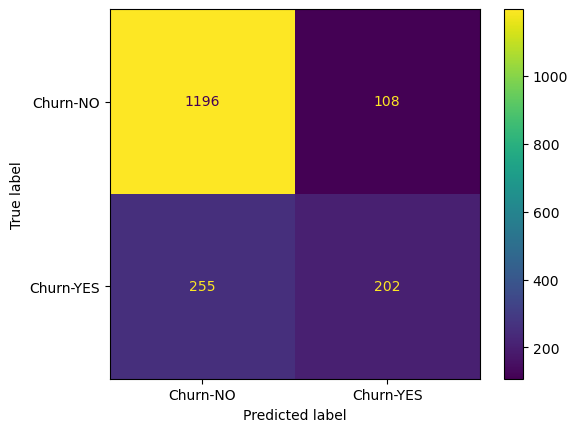

In [442]:
performance_metrics(y_pred_RF) # Performance after RFC (Random forest Cllassification) without PCA

 > ## ***MACHINE LEARNING MODELS (WITH PCA)***



#### LOGISTIC REGRESSION

In [443]:
# LogisticRegression with PCA
churn_pred_LR_PCA = LogisticRegression() # dependent value prediction
churn_pred_LR_PCA.fit(P_train, q_train) # Model fitting

LogisticRegression()

In [444]:
q_pred_LR = churn_pred_LR_PCA.predict(P_test) # predicted values for Logistic Regression with PCA

Precision :  0.7871
Recall :  0.7871
Accuracy :  0.7871
F1 Score :  0.7871

 [[1179  125]
 [ 250  207]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1304
           1       0.62      0.45      0.52       457

    accuracy                           0.79      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.77      0.79      0.78      1761

******************************************************



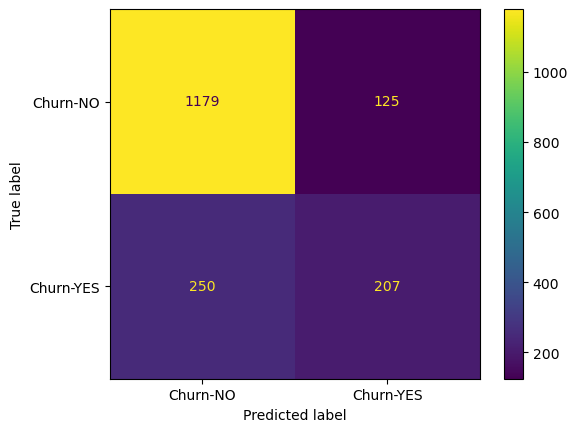

In [445]:
performance_metrics(q_pred_LR) #Performance of Logistic regression with PCA

#### GRADIENT BOOSTING CLASSIFIER

In [446]:
# Again importing GradientBoostingClassifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier
churn_pred_GB_PCA = GradientBoostingClassifier() # predicting the dependent values using GBC
churn_pred_GB_PCA.fit(P_train, q_train) # Model fitting

GradientBoostingClassifier()

Precision :  0.7978
Recall :  0.7978
Accuracy :  0.7978
F1 Score :  0.7978

 [[1191  113]
 [ 243  214]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1304
           1       0.65      0.47      0.55       457

    accuracy                           0.80      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.78      0.80      0.79      1761

******************************************************



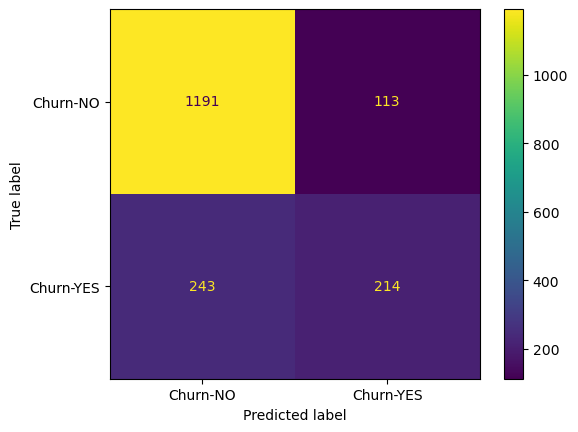

In [447]:
q_pred_GB = churn_pred_GB_PCA.predict(P_test)
performance_metrics(q_pred_GB) # Performance after gradient boosting with PCA

#### RANDOM FOREST

In [448]:
# Importing RandomForestClassifier from Sklearn
from sklearn.ensemble import RandomForestClassifier
churn_pred_RF_PCA = RandomForestClassifier() # dependent value prediction using RFC
churn_pred_RF_PCA.fit(P_train, q_train) # model fitting

RandomForestClassifier()

Precision :  0.7888
Recall :  0.7888
Accuracy :  0.7888
F1 Score :  0.7888

 [[1189  115]
 [ 257  200]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1304
           1       0.63      0.44      0.52       457

    accuracy                           0.79      1761
   macro avg       0.73      0.67      0.69      1761
weighted avg       0.77      0.79      0.77      1761

******************************************************



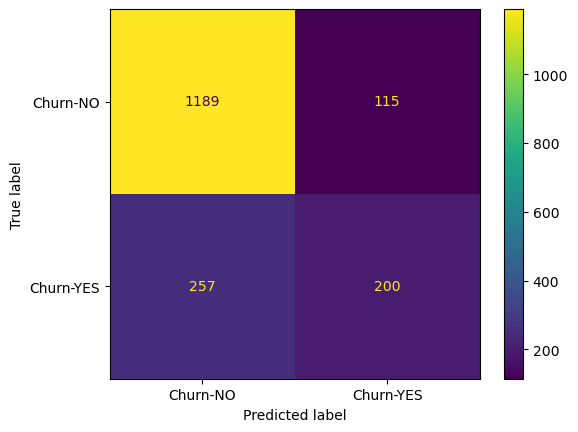

In [449]:
q_pred_RF = churn_pred_RF_PCA.predict(P_test) # predicted values for random forest with PCA
performance_metrics(q_pred_RF) # Performance after RFC (Random forest Cllassification) with PCA